Name: Nourin Nahar Hridy

ID: 2021-1-60-102

Course: CSE366

Section: 4

Instructor: Dr. Mohammad Rifat Ahmmad Rashid (Assistant Professor, CSE)

Libraries:

In [100]:
import numpy as np #NumPy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

Mock Data Generated:

In [101]:
#Generating Mock Data
def generateMockData(numTasks = 10, numRobots = 5):
  taskDuration = np.random.randint(0, 10, size = numTasks)
  taskPriorities = np.random.randint(0, 5, size = numTasks)
  robotEff = [0.1, 0.0002, 0.3, 0.4, 0.5]

  return taskDuration, taskPriorities, robotEff

Visualization:

In [102]:
#Visualization

def visualization(solution, taskDuration, taskPriorities, robotEff):
  grid = np.zeros((len(robotEff), len(taskDuration)), dtype = float) #array building
  for taskIndex, robotIndex in enumerate(solution):
    grid[robotIndex, taskIndex] = taskDuration[taskIndex]

  fig, ax = plt.subplots(figsize=(10,5))
  cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "red"])

  cax = ax.matshow(grid, cmap = cmap)
  fig.colorbar(cax, label = 'Task Duration in Hours') #colorbar

  for (i, j), z in np.ndenumerate(grid):
    tp = taskPriorities[j]
    td = taskDuration[j]

    ax.text(j, i, f'P{tp}\n{td}h', ha = 'right' , va = 'center') #

  ax.set_xticks(np.arange(len(taskDuration)))
  ax.set_yticks(np.arange(len(robotEff)))

  ax.set_xticklabels([f'Task{i+1}' for i in range(len(taskDuration))], rotation = 45, ha = "left" )
  ax.set_yticklabels([f'Robot{i+1} (Efficiency: {eff:.4f})' for i, eff in enumerate(robotEff)])

  plt.xlabel('Tasks')
  plt.ylabel('Robots')
  plt.title('Task Asssignments with Duration and Priority')


  priority_patches = [mpatches.Patch(color = 'white', label = f'Priority {i}') for i in range(1,6)]
  plt.legend(handles = priority_patches, bbox_to_anchor = (1.20, 1), loc = 'upper left', title = "Task Priorities")

  plt.tight_layout()
  plt.show()
  return grid





Random Seed:

In [103]:
np.random.seed(20)

Genetic Algorithm:

In [104]:
#Genetic Algorithm

def runGeneticAlgorithm(taskDuration, taskPriorities, robotEff, populationSize = 100, nGeneration = 100, tournamentSize = 5, mutationRate = 0.1):

  population = [np.random.randint(0, len(robotEff), size = len(taskDuration)) for _ in range(populationSize)]


#Fitness Calculation
  def calculationFitness(solution):
    totalTimes = np.zeros(len(robotEff))
    for task, robot in enumerate(solution):
      totalTimes[robot] += taskDuration[task]*taskPriorities[task]/robotEff[robot]

    tTotal = np.max(totalTimes)
    workLoad = np.std(totalTimes)
    fitness = tTotal + workLoad

    return fitness

#Selection
  def selection(population, tournamentSize):
    selectedSolutions = []

    for _ in range(len(population)):
      tournamentIndices = np.random.choice(len(population), tournamentSize, replace = False)
      tournamentSolutions = [population[i] for i in tournamentIndices]
      tournamentFitness = [calculationFitness(sol) for sol in tournamentSolutions]
      winnerIndex = np.argmin(tournamentFitness)
      selectedSolutions.append(tournamentSolutions[winnerIndex])
    return selectedSolutions

#Crossover
  def crossover(parent1, parent2):
     crossoverPoint = np.random.randint(1, len(parent1))
     child1 = np.concatenate((parent1[:crossoverPoint], parent2[crossoverPoint:]))
     child2 = np.concatenate((parent2[:crossoverPoint], parent1[crossoverPoint:]))

     return child1, child2

#Mutation
  def mutate(solution, mutationRate):
    mutatedSolution = solution.copy()
    for i in range (len(mutatedSolution)):
      if np.random.rand() < mutationRate:
        swapIndex = np.random.randint(len(mutatedSolution))
        mutatedSolution[i], mutatedSolution[swapIndex] = mutatedSolution[swapIndex], mutatedSolution[i]
    return mutatedSolution

#Genetic Algo Code
  bestSolution = None
  bestFitness = float('inf')
  bestGeneration = None

  for generation in range(nGeneration):
    parents = selection(population, tournamentSize)
    nextGeneration = []
    for i in range (0, len(parents), 2):
      parent1, parent2 = parents[i], parents[i+1]
      child1, child2 = crossover(parent1, parent2)
      child1 = mutate(child1, mutationRate)
      child2 = mutate(child2, mutationRate)
      nextGeneration.extend([child1, child2])
    population = nextGeneration


    currentBestSolution = min(population, key = calculationFitness)
    currentBestFitness = calculationFitness(currentBestSolution)
    if currentBestFitness < bestFitness:
      bestSolution = currentBestSolution
      bestGeneration = generation


  return bestSolution, bestGeneration, population


Running Genetic Algorithm Function

Best Solution: [0 4 2 4 4 4 4 2 3 3]
Solution At Generation: 99


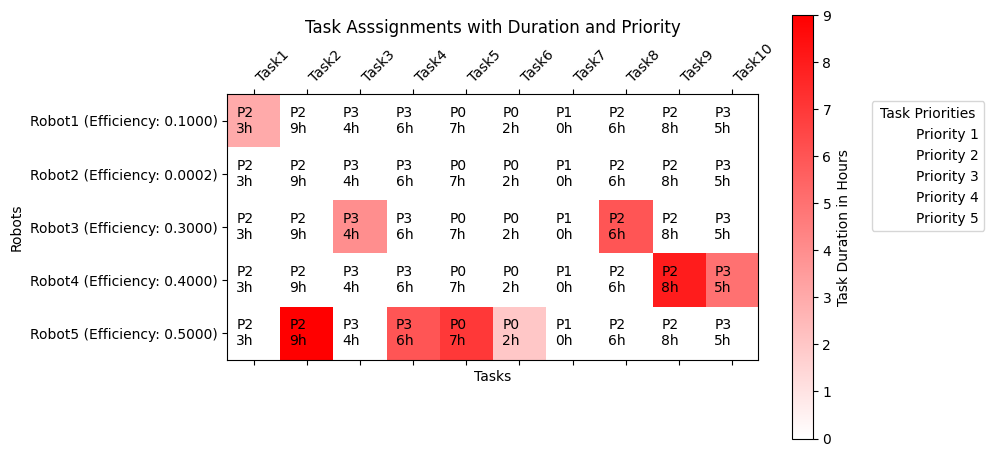

In [105]:
numTasks = 10
numRobots = 5

populationSize = 50
nGeneration = 100
tournamentSize = 5
mutationRate = 0.1

taskDuration, taskPriorities, robotEff = generateMockData(numTasks, numRobots)

bestSolution, bestGeneration, population = runGeneticAlgorithm(taskDuration, taskPriorities, robotEff, populationSize, nGeneration, tournamentSize, mutationRate)
print(f'Best Solution: {bestSolution}')
print(f'Solution At Generation: {bestGeneration}')

grid = visualization(bestSolution, taskDuration, taskPriorities, robotEff)


In [ ]:
grid

array([[ 2.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  6.,  0.,  0.,  0.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  7.],
       [ 0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  7.,  0.,  0.,  0.]])

In [ ]:
grid = np.zeros((5, 10), dtype = int)

In [ ]:
grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])